## Plot different SVM classifiers
This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. 
- `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.
- `LinearSVC` uses the 'one vs rest' multi-class reduction while `SVC` uses 'one vs one' multi-class reduction.

Both linear models have linear decision boundaries while the non-linear kernel models (polynomial or gaussian rbf) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

1. Load the data

In [4]:
# Import libraries
import matplotlib.pyplot as plt 
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# Load the data
iris = datasets.load_iris()
# Take the first two features
X = iris["data"][:, :2]
y = iris["target"]

2. Train different SVM models

In [5]:
C = 1.0
# Create an instance of SVM
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

3. Plot the data and decision boundaries

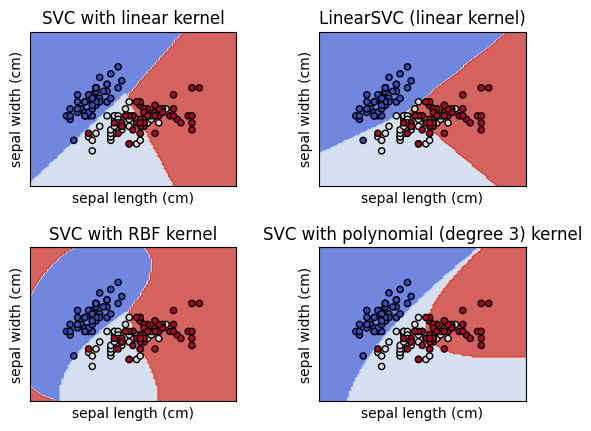

In [6]:
# Set the title for plots
titles  = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Plot the results
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

# Iterate through all the four classifiers
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        estimator=clf,
        X=X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
